In [2]:
#import the necessary functions for the program
from urllib.request import urlretrieve
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
#defines a function to load in the data, fix the datetimes and set this as the new index
def clean_data(URL):
    urlretrieve(URL,'file')
    data = pd.read_csv('file',skiprows=4)
    data['time'] = data['time'].replace({'24:00':'00:00'})
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['time'],dayfirst=True)
    for x in data.index:
        if data.iloc[x]['Datetime'].strftime("%H:%M") == "00:00":
            y = data.iloc[x]['Datetime'] + datetime.timedelta(days=1)
            data.at[x,'Datetime'] = y
    data.set_index('Datetime', inplace=True)
    return data


In [4]:
#create datasets for each of the four available years
data_2020 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2020.csv')
data_2019 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2019.csv')
data_2018 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2018.csv')
data_2017 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2017.csv')
data_2016 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2016.csv')

(0, 332624.6860860001)

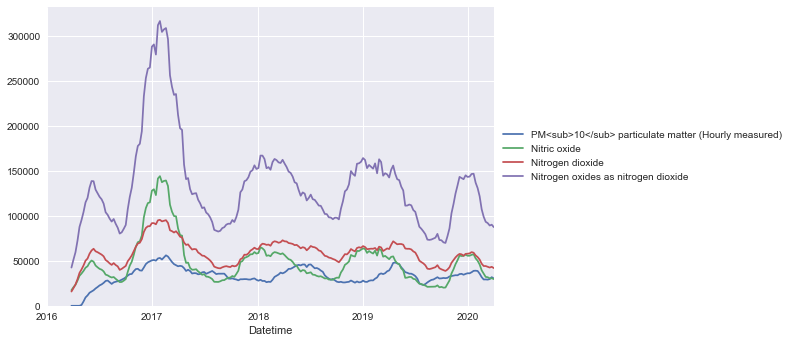

In [12]:
data_total = pd.concat([data_2020,data_2019,data_2018,data_2017,data_2016]) #create a merged dataset of all the yearly data combined
plt.style.use('seaborn')
plot = data_total.resample('W').sum().rolling(13).sum().plot() #create a rolling average to remove spikes
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plot.set_ylim(0,None)

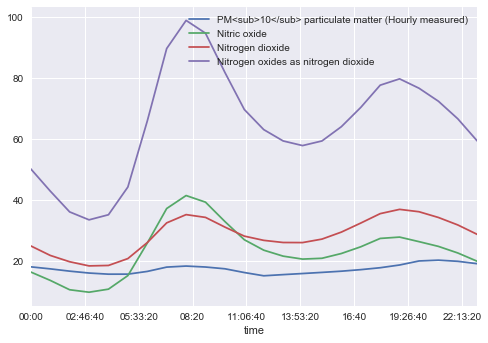

In [7]:
data_total.groupby(data_total.index.time).mean().plot()

In [8]:
pivoted = data_total.pivot_table('Nitrogen oxides as nitrogen dioxide', index=data_total.index.time, columns=data_total.index.date)